In [1]:
import rasterio

In [100]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from matplotlib import pyplot as plt
import topojson as tp

In [3]:
rki = gpd.read_file('RKI_Corona_Landkreise.geojson')

In [86]:
geometry_lk = rki[['county', 'geometry']]
geometry_lk.memory_usage()

Index        128
county      3296
geometry    3296
dtype: int64

In [87]:
topo = tp.Topology(geometry_lk, prequantize=False)

In [88]:
geometry_lk_simplified = topo.toposimplify(4).to_gdf()

In [102]:
#geometry_lk_simplified.set_index('county', inplace=True)
geometry_lk_simplified.to_pickle('geometry_lk_simplified.gzip')

In [5]:
pavel = pd.read_csv('Data.csv')

In [91]:
merged = gpd.GeoDataFrame(pavel.join(geometry_lk_simplified, on='Landkreis'))

In [54]:
sub = merged[['Landkreis', 'Kontaktrisiko', 'InzidenzFallNeu-7-Tage', 'geometry']]
sub['Kehrwert_risiko'] = 1/sub['Kontaktrisiko']

/Users/bjoern/Working/covid19/Corona/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [92]:
sub

,Landkreis,Kontaktrisiko,InzidenzFallNeu-7-Tage,geometry,Kehrwert_risiko
0,LK Greiz,44.862639,386.044888,"MULTIPOLYGON (((12.19167 50.96358, 12.19448 50...",0.022290
1,LK Peine,61.759740,178.782057,"MULTIPOLYGON (((10.29191 52.44790, 10.29234 52...",0.016192
2,SK Ansbach,62.739106,133.977702,"MULTIPOLYGON (((10.58451 49.34231, 10.58665 49...",0.015939
3,SK Hof,77.635148,342.607747,"MULTIPOLYGON (((11.88020 50.35407, 11.88068 50...",0.012881
4,LK Ansbach,79.731357,139.768461,"MULTIPOLYGON (((10.22175 49.49031, 10.22245 49...",0.012542
...,...,...,...,...,...
424,LK Northeim,2435.206438,24.190195,"MULTIPOLYGON (((9.66096 51.56253, 9.66196 51.5...",0.000411
425,LK Cochem-Zell,2692.030937,21.181263,"MULTIPOLYGON (((7.07428 50.27758, 7.07510 50.2...",0.000371
426,SK Speyer,3415.169572,17.800281,"MULTIPOLYGON (((8.42361 49.36754, 8.42397 49.3...",0.000293
427,LK Dithmarschen,3474.054960,11.261853,"MULTIPOLYGON (((8.69258 54.06045, 8.69364 54.0...",0.000288


<GeoAxesSubplot:>

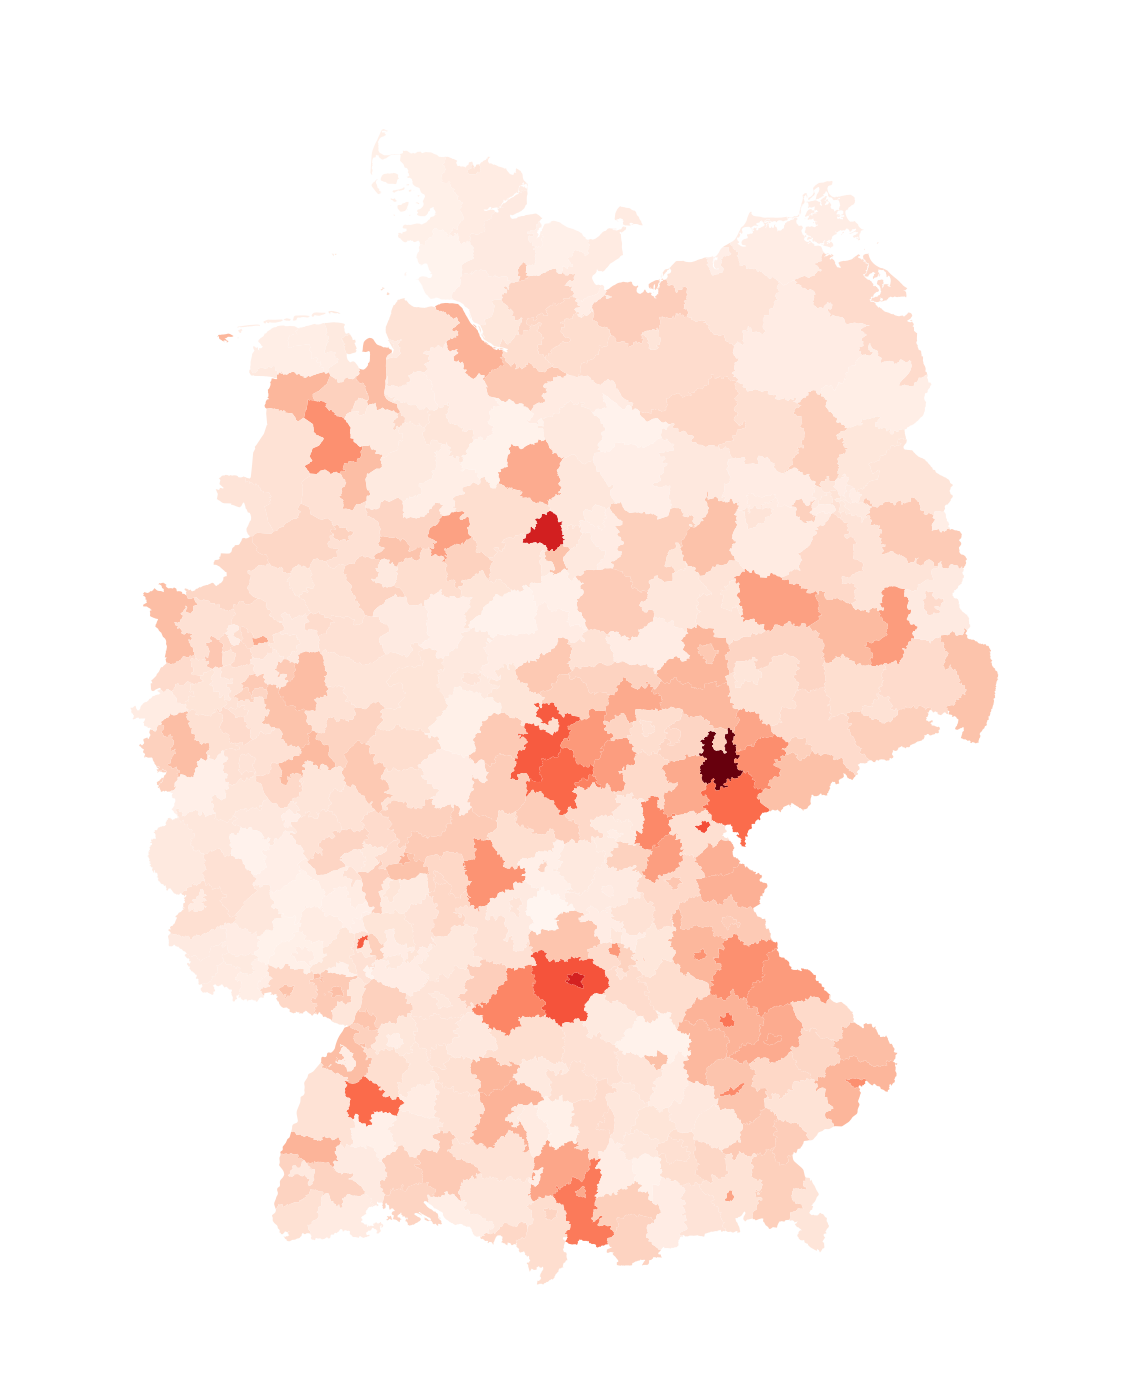

In [93]:
gplt.choropleth(sub, hue='Kehrwert_risiko', cmap='Reds', figsize=(20, 30 ), legend=False, projection=gcrs.AlbersEqualArea())

<AxesSubplot:>

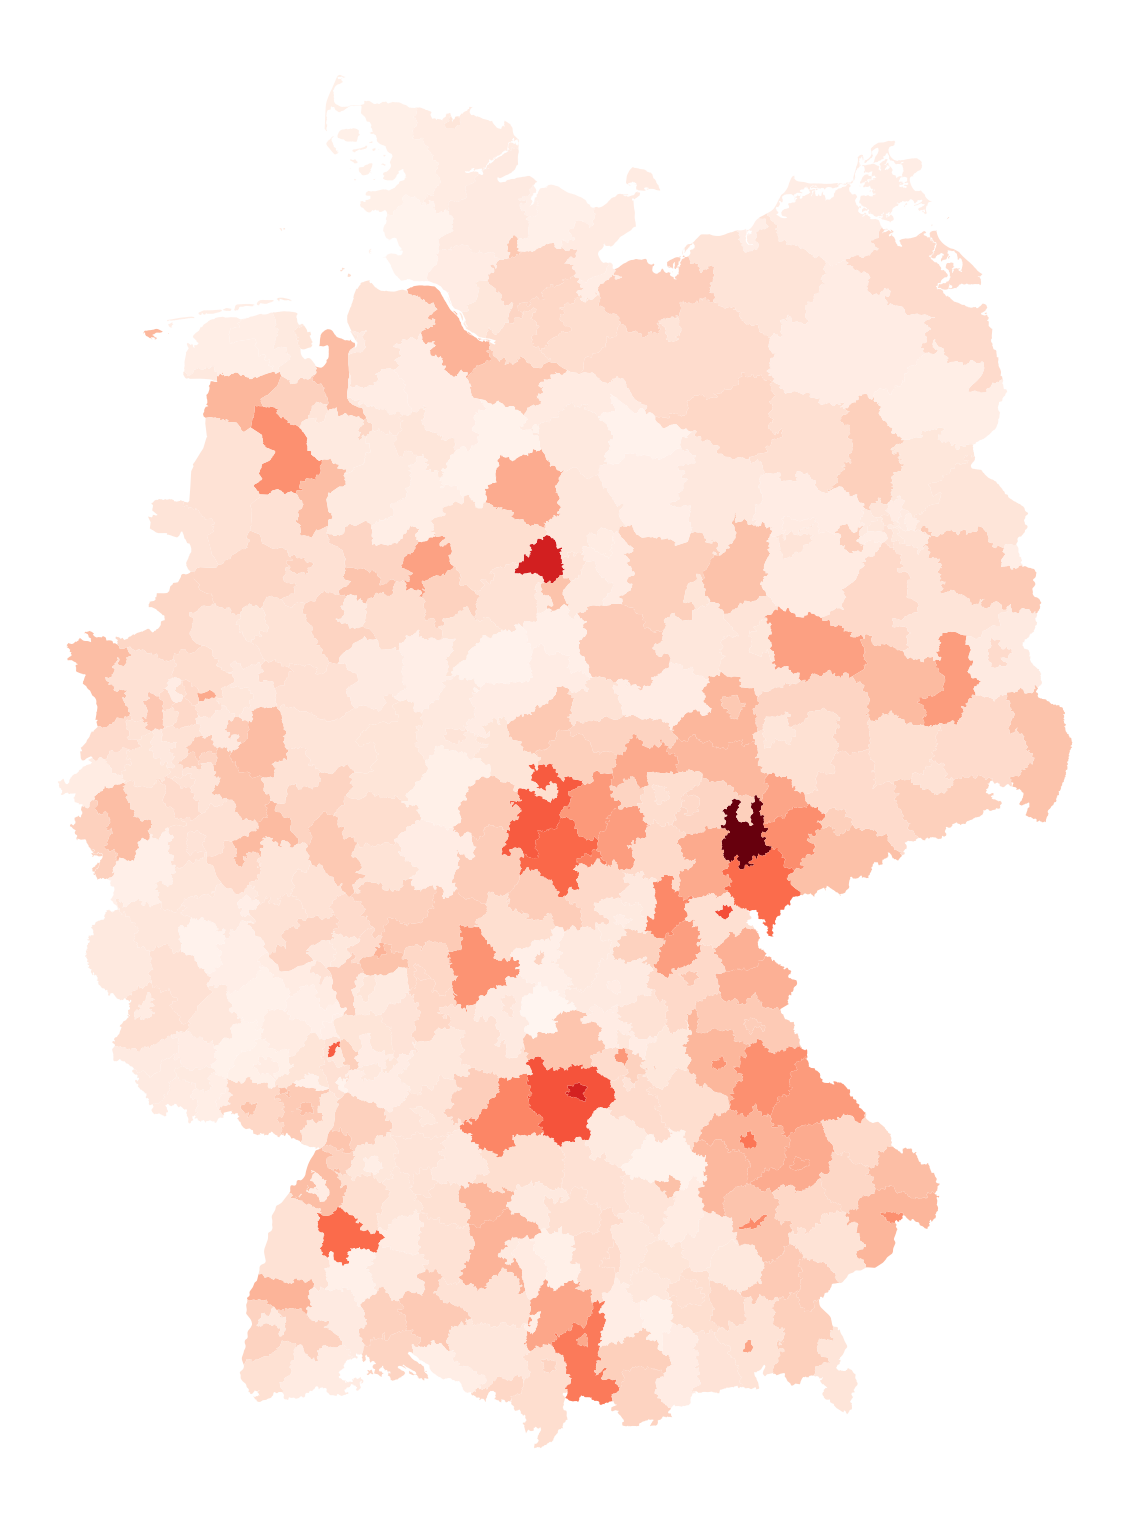

In [94]:
fig, ax = plt.subplots(figsize=[20,30])
ax.axis('off')
sub.plot(column='Kehrwert_risiko', cmap='Reds', figsize=(8, 16 ), ax=ax)

In [32]:
fig.set_size_inches(20, 30)
fig.savefig('deutschland_risiko-covid.svg')

In [95]:
berlin = sub[sub.Landkreis.str.contains("SK Berlin")]

In [96]:
berlin

,Landkreis,Kontaktrisiko,InzidenzFallNeu-7-Tage,geometry,Kehrwert_risiko
211,SK Berlin Tempelhof-Schöneberg,371.512741,78.234433,"MULTIPOLYGON (((13.38759 52.38677, 13.38755 52...",0.002692
236,SK Berlin Mitte,401.016908,77.894958,"MULTIPOLYGON (((13.37721 52.56091, 13.37727 52...",0.002494
271,SK Berlin Reinickendorf,460.537890,73.416438,"MULTIPOLYGON (((13.32074 52.62660, 13.32104 52...",0.002171
305,SK Berlin Neukölln,559.757639,75.929690,"MULTIPOLYGON (((13.45832 52.48569, 13.45856 52...",0.001786
306,SK Berlin Charlottenburg-Wilmersdorf,561.667365,61.691647,"MULTIPOLYGON (((13.32111 52.52446, 13.32137 52...",0.001780
324,SK Berlin Treptow-Köpenick,613.470251,55.411825,"MULTIPOLYGON (((13.57925 52.39083, 13.57894 52...",0.001630
331,SK Berlin Spandau,633.101807,59.985989,"MULTIPOLYGON (((13.23119 52.56124, 13.23135 52...",0.001580
336,SK Berlin Friedrichshain-Kreuzberg,663.505947,54.140319,"MULTIPOLYGON (((13.45529 52.52127, 13.45621 52...",0.001507
344,SK Berlin Lichtenberg,679.277855,61.396069,"MULTIPOLYGON (((13.52316 52.47424, 13.52289 52...",0.001472
373,SK Berlin Pankow,831.776697,39.917554,"MULTIPOLYGON (((13.50481 52.61960, 13.50484 52...",0.001202


211    Annotation(13.3807, 52.4411, ' Tempelhof-Schön...
236               Annotation(13.3659, 52.5329, ' Mitte')
271       Annotation(13.2913, 52.5957, ' Reinickendorf')
305             Annotation(13.455, 52.4411, ' Neukölln')
306    Annotation(13.2702, 52.501, ' Charlottenburg-W...
324    Annotation(13.6112, 52.4296, ' Treptow-Köpenick')
331             Annotation(13.1785, 52.5255, ' Spandau')
336    Annotation(13.4282, 52.5038, ' Friedrichshain-...
344         Annotation(13.5098, 52.5349, ' Lichtenberg')
373              Annotation(13.4402, 52.5972, ' Pankow')
384    Annotation(13.2391, 52.4348, ' Steglitz-Zehlen...
389    Annotation(13.5788, 52.5211, ' Marzahn-Hellers...
dtype: object

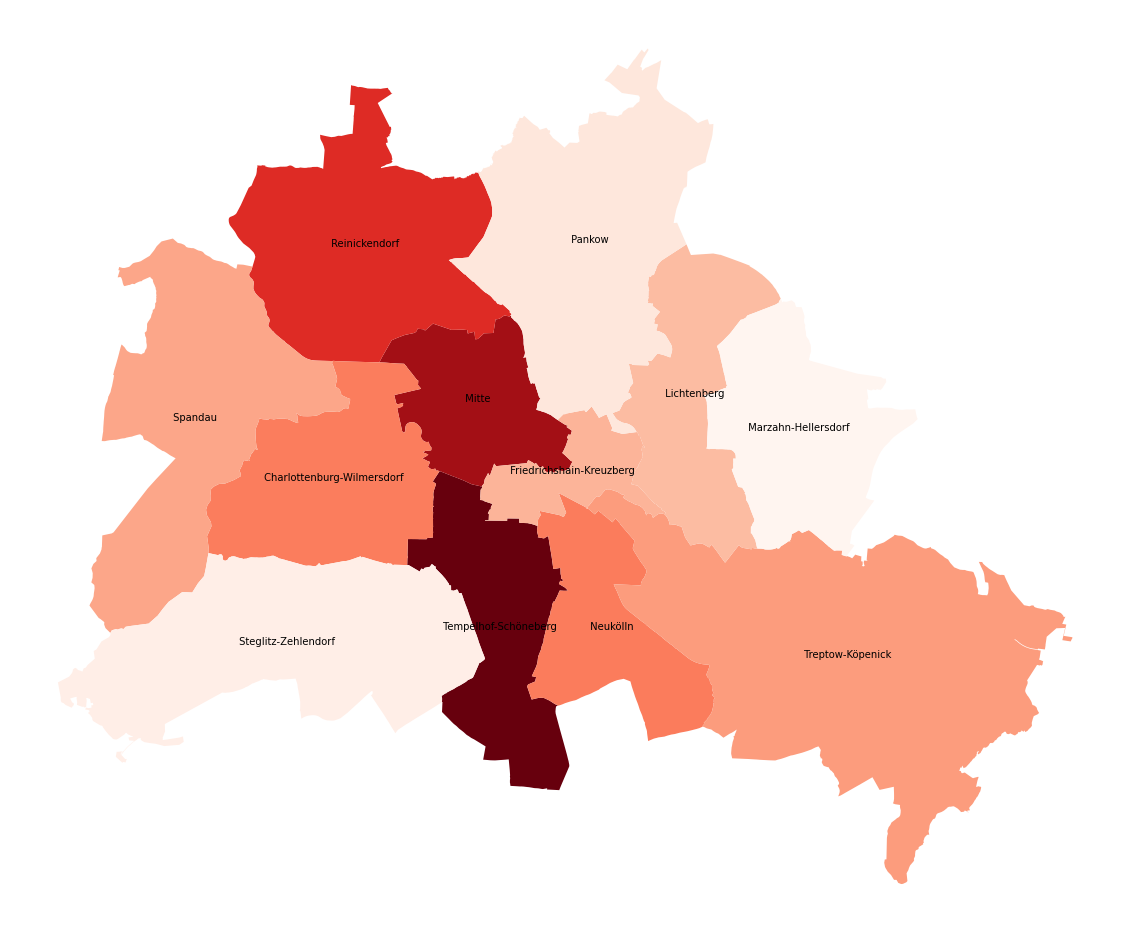

In [97]:
fig, ax = plt.subplots(figsize=[20,30])
ax.axis('off')
ax = berlin.plot(column='Kehrwert_risiko', cmap='Reds', figsize=(8, 16 ), ax=ax)
berlin.apply(lambda x: ax.annotate(text=x.Landkreis[9:], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

In [99]:
fig.set_size_inches(20, 30)
fig.savefig('Berlin_risiko-covid.svg',) #dpi=300)